# Linear

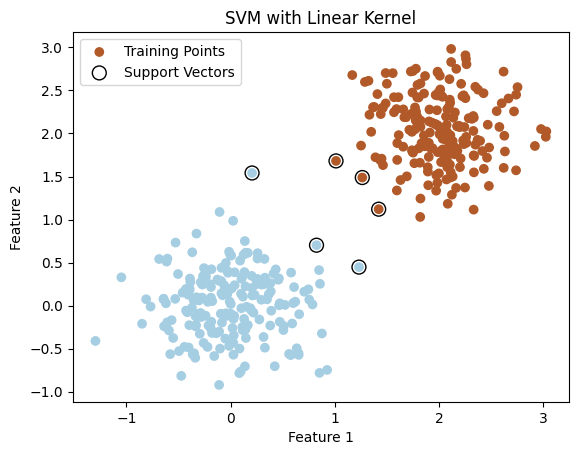

Number of support vectors for positive class: 3
Number of support vectors for negative class: 3
Margin value: 0.9312532138939213


In [1]:
import os
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
training_folder = "./Linear/Training"
testing_folder = "./Linear/Testing"

# Load training data
X_train = np.load(os.path.join(training_folder, "X_train_linear.npy"))
y_train = np.load(os.path.join(training_folder, "y_train_linear.npy"))

# Load testing data
X_test = np.load(os.path.join(testing_folder, "X_test_linear.npy"))
y_test = np.load(os.path.join(testing_folder, "y_test_linear.npy"))

# Step 2: Preprocess the Data (if needed)

# Step 3: Train the SVM Model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 4: Identify Support Vectors
support_vectors = model.support_vectors_
support_vectors_indices = model.support_

# Step 5: Plot the Data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Training Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')
plt.legend()
plt.show()

# Step 6: Report Support Vector Counts
num_support_vectors_per_class = model.n_support_
print("Number of support vectors for positive class:", num_support_vectors_per_class[1])
print("Number of support vectors for negative class:", num_support_vectors_per_class[0])

# Step 7: Compute Margin
margin = 2 / np.linalg.norm(model.coef_)
print("Margin value:", margin)


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data
X_train = np.load('./Linear/Training/X_train_linear.npy')
y_train = np.load('./Linear/Training/y_train_linear.npy')
X_test = np.load('./Linear/Testing/X_test_linear.npy')
y_test = np.load('./Linear/Testing/y_test_linear.npy')

# Define hyperparameters
k_values = [2, 3, 5, 8, 10]
distance_measures = ['euclidean', 'manhattan', 'mahalanobis']

best_accuracy = 0
best_hyperparameters = {}

# Iterate over all combinations of hyperparameters
for k in k_values:
    for distance in distance_measures:
        # Train k-NN classifier
        if distance == 'mahalanobis':
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance, metric_params={'V': np.cov(X_train.T)})
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        
        knn.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Track best hyperparameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters['k'] = k
            best_hyperparameters['distance'] = distance

# Report best performing hyperparameter configuration
print("Best performing hyperparameter configuration:")
print("k:", best_hyperparameters['k'])
print("Distance measure:", best_hyperparameters['distance'])
print("Accuracy:", best_accuracy)


Best performing hyperparameter configuration:
k: 2
Distance measure: euclidean
Accuracy: 1.0


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

# Load the data
X_train = np.load('./Linear/Training/X_train_linear.npy')
y_train = np.load('./Linear/Training/y_train_linear.npy')
X_test = np.load('./Linear/Testing/X_test_linear.npy')
y_test = np.load('./Linear/Testing/y_test_linear.npy')

# Best performing hyperparameters for SVM and k-NN
best_svm_parameters = {'C': 1.0, 'kernel': 'linear'}
best_knn_parameters = {'k': 5, 'distance': 'euclidean'}

# Train SVM with best hyperparameters
svm_model = SVC(**best_svm_parameters)
# print(*best_svm_parameters)
svm_model.fit(X_train, y_train)

# Train k-NN with best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=best_knn_parameters['k'], metric=best_knn_parameters['distance'])
knn_model.fit(X_train, y_train)

# Evaluate SVM model
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

# Evaluate k-NN model
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

# Print results
print("Support Vector Machine Classifier Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

print("\nK-Nearest Neighbors Classifier Performance:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


Support Vector Machine Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

K-Nearest Neighbors Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [16]:
# Find misclassified points by SVM and k-NN
misclassified_svm = []
misclassified_knn = []
correct_svm_wrong_knn = []
correct_knn_wrong_svm = []

# Predictions by SVM and k-NN
svm_y_pred = svm_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# Iterate through test dataset
for i in range(len(X_test)):
    if svm_y_pred[i] != y_test[i]:  # Misclassified by SVM
        misclassified_svm.append((X_test[i], y_test[i]))
        if knn_y_pred[i] == y_test[i]:  # Correctly classified by k-NN
            correct_knn_wrong_svm.append((X_test[i], y_test[i]))
    elif knn_y_pred[i] != y_test[i]:  # Misclassified by k-NN
        misclassified_knn.append((X_test[i], y_test[i]))
        if svm_y_pred[i] == y_test[i]:  # Correctly classified by SVM
            correct_svm_wrong_knn.append((X_test[i], y_test[i]))

# Print results
print("Misclassified points by SVM:", len(misclassified_svm))
print("Misclassified points by k-NN:", len(misclassified_knn))
print("Points correctly classified by SVM but not by k-NN:", len(correct_svm_wrong_knn))
print("Points correctly classified by k-NN but not by SVM:", len(correct_knn_wrong_svm))


Misclassified points by SVM: 0
Misclassified points by k-NN: 0
Points correctly classified by SVM but not by k-NN: 0
Points correctly classified by k-NN but not by SVM: 0


-----

# Non-Linear

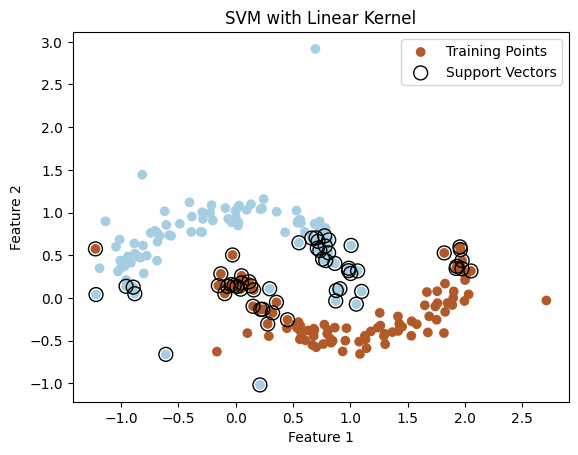

Number of support vectors for positive class: 30
Number of support vectors for negative class: 30
Margin value: 0.8344140853920431


In [17]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Load the data
X_train = np.load('./Non-Linear\Testing\X_test_non_linear.npy')
y_train = np.load('./Non-Linear\Testing\y_test_non_linear.npy')

# Train the SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Identify support vectors
support_vectors = svm_model.support_vectors_
support_vector_labels = svm_model.dual_coef_.ravel() > 0

# Plot the data and support vectors
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Training Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')
plt.legend()
plt.show()

# Report number of support vectors
num_support_vectors_positive = np.sum(support_vector_labels)
num_support_vectors_negative = len(support_vector_labels) - num_support_vectors_positive
print("Number of support vectors for positive class:", num_support_vectors_positive)
print("Number of support vectors for negative class:", num_support_vectors_negative)

# Compute margin
margin = 2 / np.linalg.norm(svm_model.coef_)
print("Margin value:", margin)


In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the test data
X_test = np.load('./Non-Linear/Testing/X_test_non_linear.npy')
y_test = np.load('./Non-Linear/Testing/y_test_non_linear.npy')

# Define hyperparameters
k_values = [2, 3, 5, 8, 10]
distance_measures = ['euclidean', 'manhattan', 'mahalanobis']

best_accuracy = 0
best_hyperparameters = {}

# Iterate over all combinations of hyperparameters
for k in k_values:
    for distance in distance_measures:
        # Train k-NN classifier
        if distance == 'mahalanobis':
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance, metric_params={'V': np.cov(X_train.T)})
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        
        # Predict and evaluate on test set
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Track best hyperparameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters['k'] = k
            best_hyperparameters['distance'] = distance

# Report best performing hyperparameter configuration
print("Best performing hyperparameter configuration:")
print("k:", best_hyperparameters['k'])
print("Distance measure:", best_hyperparameters['distance'])
print("Accuracy:", best_accuracy)


Best performing hyperparameter configuration:
k: 2
Distance measure: euclidean
Accuracy: 0.995


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

# Load the test data
X_test = np.load('./Non-Linear/Testing/X_test_non_linear.npy')
y_test = np.load('./Non-Linear/Testing/y_test_non_linear.npy')

# Best performing hyperparameters for SVM and k-NN (assuming already determined)
best_svm_parameters = {'C': 1.0, 'kernel': 'linear'}
best_knn_parameters = {'k': 5, 'distance': 'euclidean'}

# Train SVM with best hyperparameters
svm_model = SVC(**best_svm_parameters)
svm_model.fit(X_train, y_train)

# Train k-NN with best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=best_knn_parameters['k'], metric=best_knn_parameters['distance'])
knn_model.fit(X_train, y_train)

# Evaluate SVM model
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

# Evaluate k-NN model
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

# Print results
print("Support Vector Machine Classifier Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

print("\nK-Nearest Neighbors Classifier Performance:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


Support Vector Machine Classifier Performance:
Accuracy: 0.865
Precision: 0.8762886597938144
Recall: 0.85
F1-score: 0.8629441624365483

K-Nearest Neighbors Classifier Performance:
Accuracy: 0.985
Precision: 0.9801980198019802
Recall: 0.99
F1-score: 0.9850746268656716


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the linear and non-linear test data
X_test_linear = np.load('./Linear/Testing/X_test_linear.npy')
y_test_linear = np.load('./Linear/Testing/y_test_linear.npy')
X_test_non_linear = np.load('./Non-Linear/Testing/X_test_non_linear.npy')
y_test_non_linear = np.load('./Non-Linear/Testing/y_test_non_linear.npy')

# Define best hyperparameters for SVM and k-NN (assuming already determined)
best_svm_parameters = {'C': 1.0, 'kernel': 'linear'}  # Example parameters
best_knn_parameters = {'k': 5, 'distance': 'euclidean'}  # Example parameters

# Initialize SVM and k-NN classifiers
svm_model_linear = SVC(**best_svm_parameters)
knn_model_linear = KNeighborsClassifier(n_neighbors=best_knn_parameters['k'], metric=best_knn_parameters['distance'])
svm_model_non_linear = SVC(kernel='rbf')
knn_model_non_linear = KNeighborsClassifier(n_neighbors=5)

# Train classifiers on linear dataset
svm_model_linear.fit(X_test_linear, y_test_linear)
knn_model_linear.fit(X_test_linear, y_test_linear)

# Train classifiers on non-linear dataset
svm_model_non_linear.fit(X_test_non_linear, y_test_non_linear)
knn_model_non_linear.fit(X_test_non_linear, y_test_non_linear)

# Evaluate classifiers on linear dataset
svm_accuracy_linear = svm_model_linear.score(X_test_linear, y_test_linear)
knn_accuracy_linear = knn_model_linear.score(X_test_linear, y_test_linear)

# Evaluate classifiers on non-linear dataset
svm_accuracy_non_linear = svm_model_non_linear.score(X_test_non_linear, y_test_non_linear)
knn_accuracy_non_linear = knn_model_non_linear.score(X_test_non_linear, y_test_non_linear)

# Print results for linear dataset
print("Performance comparison for linear dataset:")
print("SVM Accuracy:", svm_accuracy_linear)
print("k-NN Accuracy:", knn_accuracy_linear)
print()

# Print results for non-linear dataset
print("Performance comparison for non-linear dataset:")
print("SVM Accuracy:", svm_accuracy_non_linear)
print("k-NN Accuracy:", knn_accuracy_non_linear)


Performance comparison for linear dataset:
SVM Accuracy: 1.0
k-NN Accuracy: 1.0

Performance comparison for non-linear dataset:
SVM Accuracy: 0.975
k-NN Accuracy: 0.985


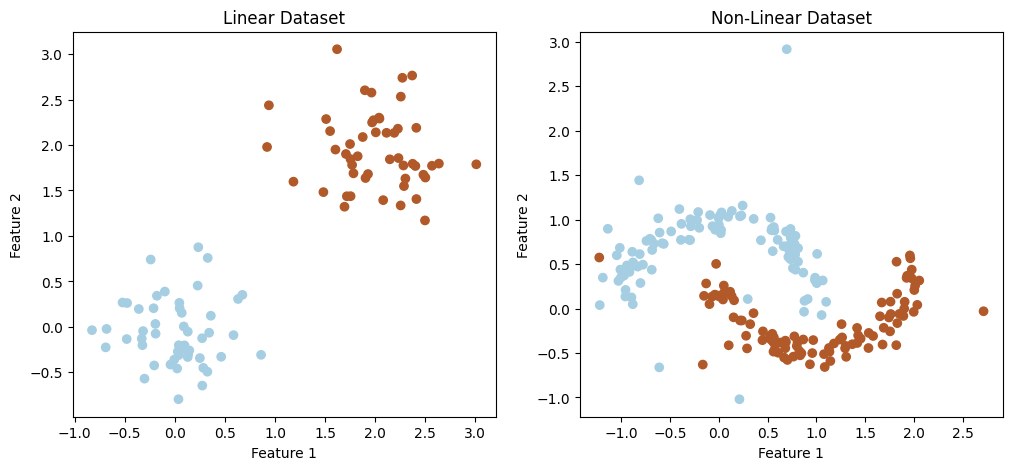

In [9]:
import matplotlib.pyplot as plt

# Load the linear and non-linear datasets
X_linear = np.load('./Linear/Testing/X_test_linear.npy')
y_linear = np.load('./Linear/Testing/y_test_linear.npy')
X_non_linear = np.load('./Non-Linear/Testing/X_test_non_linear.npy')
y_non_linear = np.load('./Non-Linear/Testing/y_test_non_linear.npy')

# Plot the linear dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=plt.cm.Paired)
plt.title("Linear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the non-linear dataset
plt.subplot(1, 2, 2)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap=plt.cm.Paired)
plt.title("Non-Linear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()
